#    EDA On Student_marks Dataset using MYSQL connection

This projects is divided into two parts as follows:-

    1)MYSQL Activities and its connection with python notebook.
    
    2)EDA process using jupyter Notebook after the Connection is established with MYSQL. 

# PART 1-> MYSQL Activities and its connection with python notebook.

The below codes are executed in command prompt:-
    After putting the complete path of the mysql exe file in cmd below codes are executed
    
    -->mysql --local-infile=1 -u root -p # enter the password after pressing enter
    
    --> show databases;# this command shows the databases available .
    
    ---> use sakila;
    
    ---> show table ;
    
    --->create table student_marks(
                Name varchar(50),
                Gender varchar(3),
                DOB DATE,
                Maths varchar(3),
                Physics varchar(3),
                Chemistry varchar(3),
                English varchar(3),
                Biology varchar(3),
                Economics varchar(3),
                History varchar(3),
                Civics varchar(3),
                check(GENDER in ('M', 'F'))
                );
    ---> show global variable like 'local_infile'#if local_infile is OFF , need to set it true using below code
    
    ---> set global local_infile=true # this will set true the local infile so that we can import the data into mysql table
    
    Now, import the student_marks.csv into the mysql table titanic_train by using below command
    
    ---> load data local infile 'here gives the path of the student_marks.csv' into table student_marks
        fields terminated by ','
        enclosed by '""'
        lines terminated by '\r\n';
        
    run select query in order to analyse the data
    
    ---> select * from student_marks;

# Part 2 - EDA process using jupyter Notebook after the Connection is established with MYSQL.

Importing the libraries

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [48]:
import mysql.connector # importing mysql.connector in order to establish a connection with mysql
import pandas as pd
con=mysql.connector.connect(
    host='localhost',
    port=3306,
    user='root',
    password='@@@@@',
    database='sakila')

Importing the data into data variable by using a dataFrame 'read_sql_query' to read the query the on titanic_train table 
on a connection con

In [49]:
data=pd.DataFrame(pd.read_sql_query('select * from student_marks',con))
data

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,2019-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,2019-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,2019-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,2019-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,2019-09-02,58,96,78,46,96,77,83,53
5,Annu,F,2019-04-05,45,87,52,89,55,89,87,52
6,pooja,F,2019-05-04,55,64,61,58,75,58,64,61
7,Ritesh,M,2019-05-25,54,76,87,56,25,56,76,87
8,Farha,F,2019-08-12,55,63,89,75,78,75,63,89
9,Mukesh,M,2019-09-02,96,46,77,83,58,83,46,77


# Null Values Analysis

In [50]:
data.isnull().sum()

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

In [51]:
data.describe()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10,10,10,10,10,10,10,10,10,10,10
unique,10,2,5,8,8,8,10,10,9,10,10
top,pooja,M,2019-04-05,55,96,78,46,55,89,46,61
freq,1,5,2,3,3,2,1,1,2,1,1


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
Name         10 non-null object
Gender       10 non-null object
DOB          10 non-null object
Maths        10 non-null object
Physics      10 non-null object
Chemistry    10 non-null object
English      10 non-null object
Biology      10 non-null object
Economics    10 non-null object
History      10 non-null object
Civics       10 non-null object
dtypes: object(11)
memory usage: 1008.0+ bytes


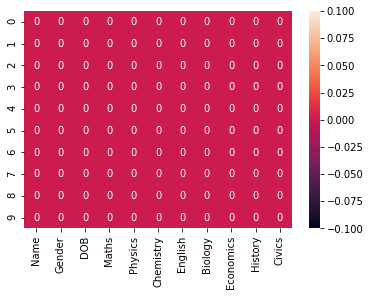

In [55]:
sns.heatmap(data.isnull(),annot=True)

# Checking the Unique Values

In [58]:
data.Maths.unique()

array(['55', '75', '25', '78', '58', '45', '54', '96'], dtype=object)

In [59]:
data.Maths.value_counts()

55    3
78    1
58    1
25    1
45    1
96    1
54    1
75    1
Name: Maths, dtype: int64

# Analysing the Plots

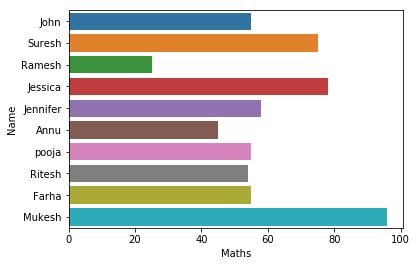

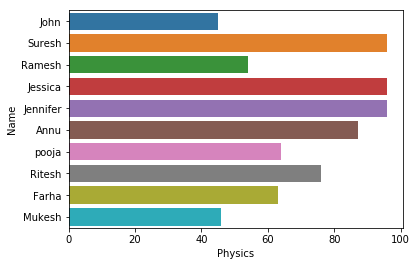

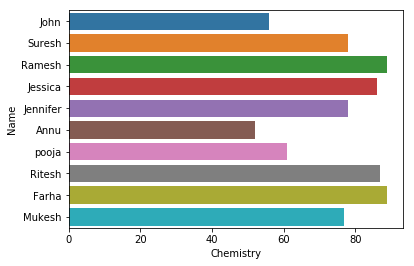

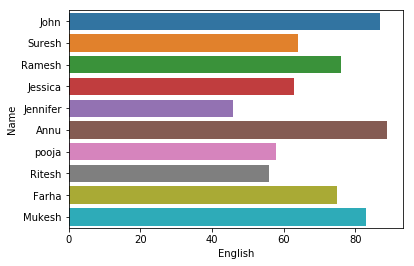

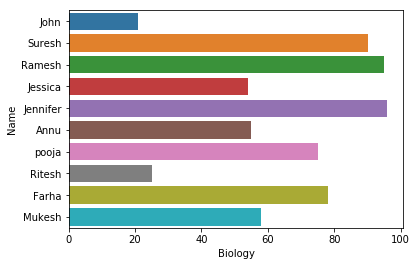

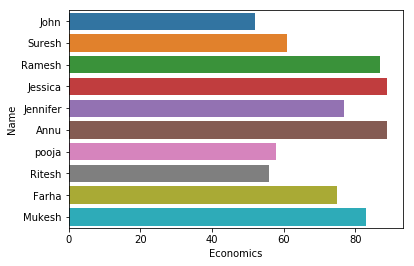

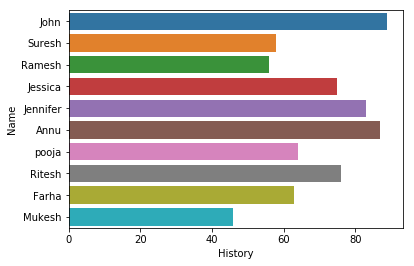

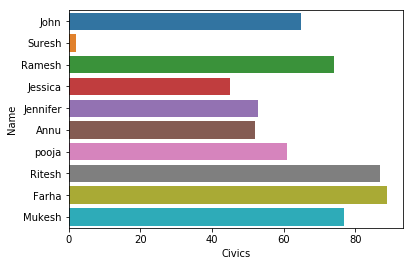

In [52]:
import seaborn as sns
Column=list(data.columns[3:])
for val in Column:
    sns.barplot(x=val,y='Name', data=data)
    plt.show()

In [30]:
for val in Column:
    print("The mean of the {} is {}".format(val,data[val].mean()))

The mean of the Maths is 5.575257858455554e+18
The mean of the Physics is 4.596549696876477e+18
The mean of the Chemistry is 5.678898678526188e+18
The mean of the English is 8.764766346895857e+18
The mean of the Biology is 2.1909554965575258e+18
The mean of the Economics is 5.261878977895856e+18
The mean of the History is 8.958567583876476e+18
The mean of the Civics is 6.527445535261879e+17


# Univariate Analysis

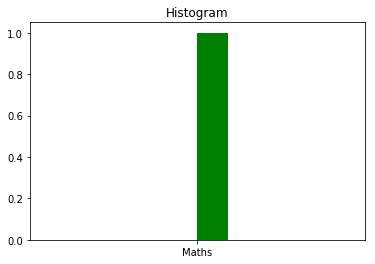

In [31]:
plt.hist(['Maths'],bins=10,color='green')
plt.title('Histogram')
plt.show()

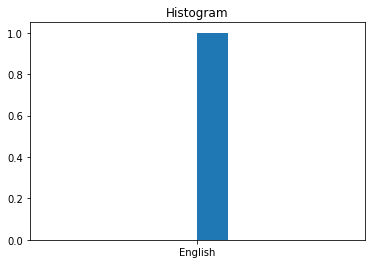

In [32]:
plt.hist(['English'],bins=10)
plt.title('Histogram')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x11e564d9e80>,
 'caps': [<matplotlib.lines.Line2D at 0x11e565ef320>,
 'boxes': [<matplotlib.lines.Line2D at 0x11e565e4860>],
 'medians': [<matplotlib.lines.Line2D at 0x11e565efbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11e565f9080>],
 'means': []}

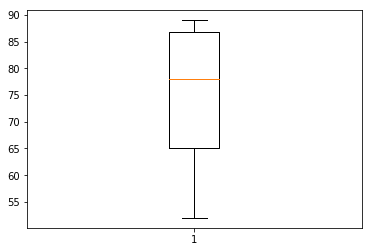

In [25]:
plt.boxplot(df['Chemistry'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x11e566a07f0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x11e564faa58>,
 'cmins': <matplotlib.collections.LineCollection at 0x11e566a0b70>,
 'cbars': <matplotlib.collections.LineCollection at 0x11e566a0dd8>}

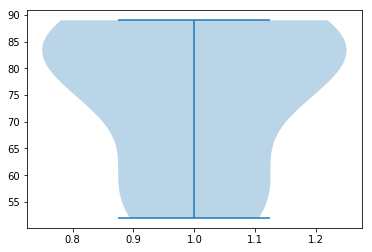

In [27]:
plt.violinplot(df['Chemistry'])

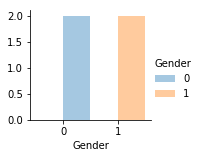

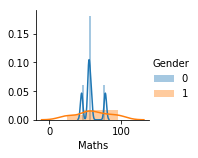

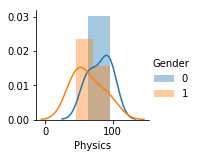

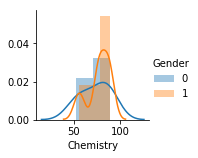

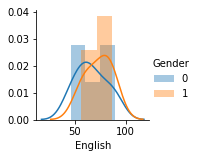

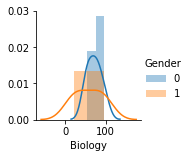

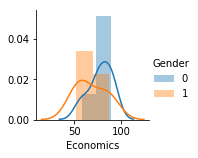

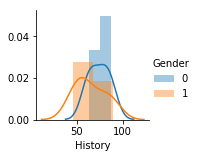

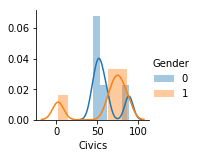

In [70]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns
for val in columns:
#Plotting Probablity Density Function Curve for the age : -
    sns.FacetGrid(data,hue="Gender",size=2.3)\
    .map(sns.distplot,val)\
    .add_legend();
plt.show();

# BIVARIATE Analysis

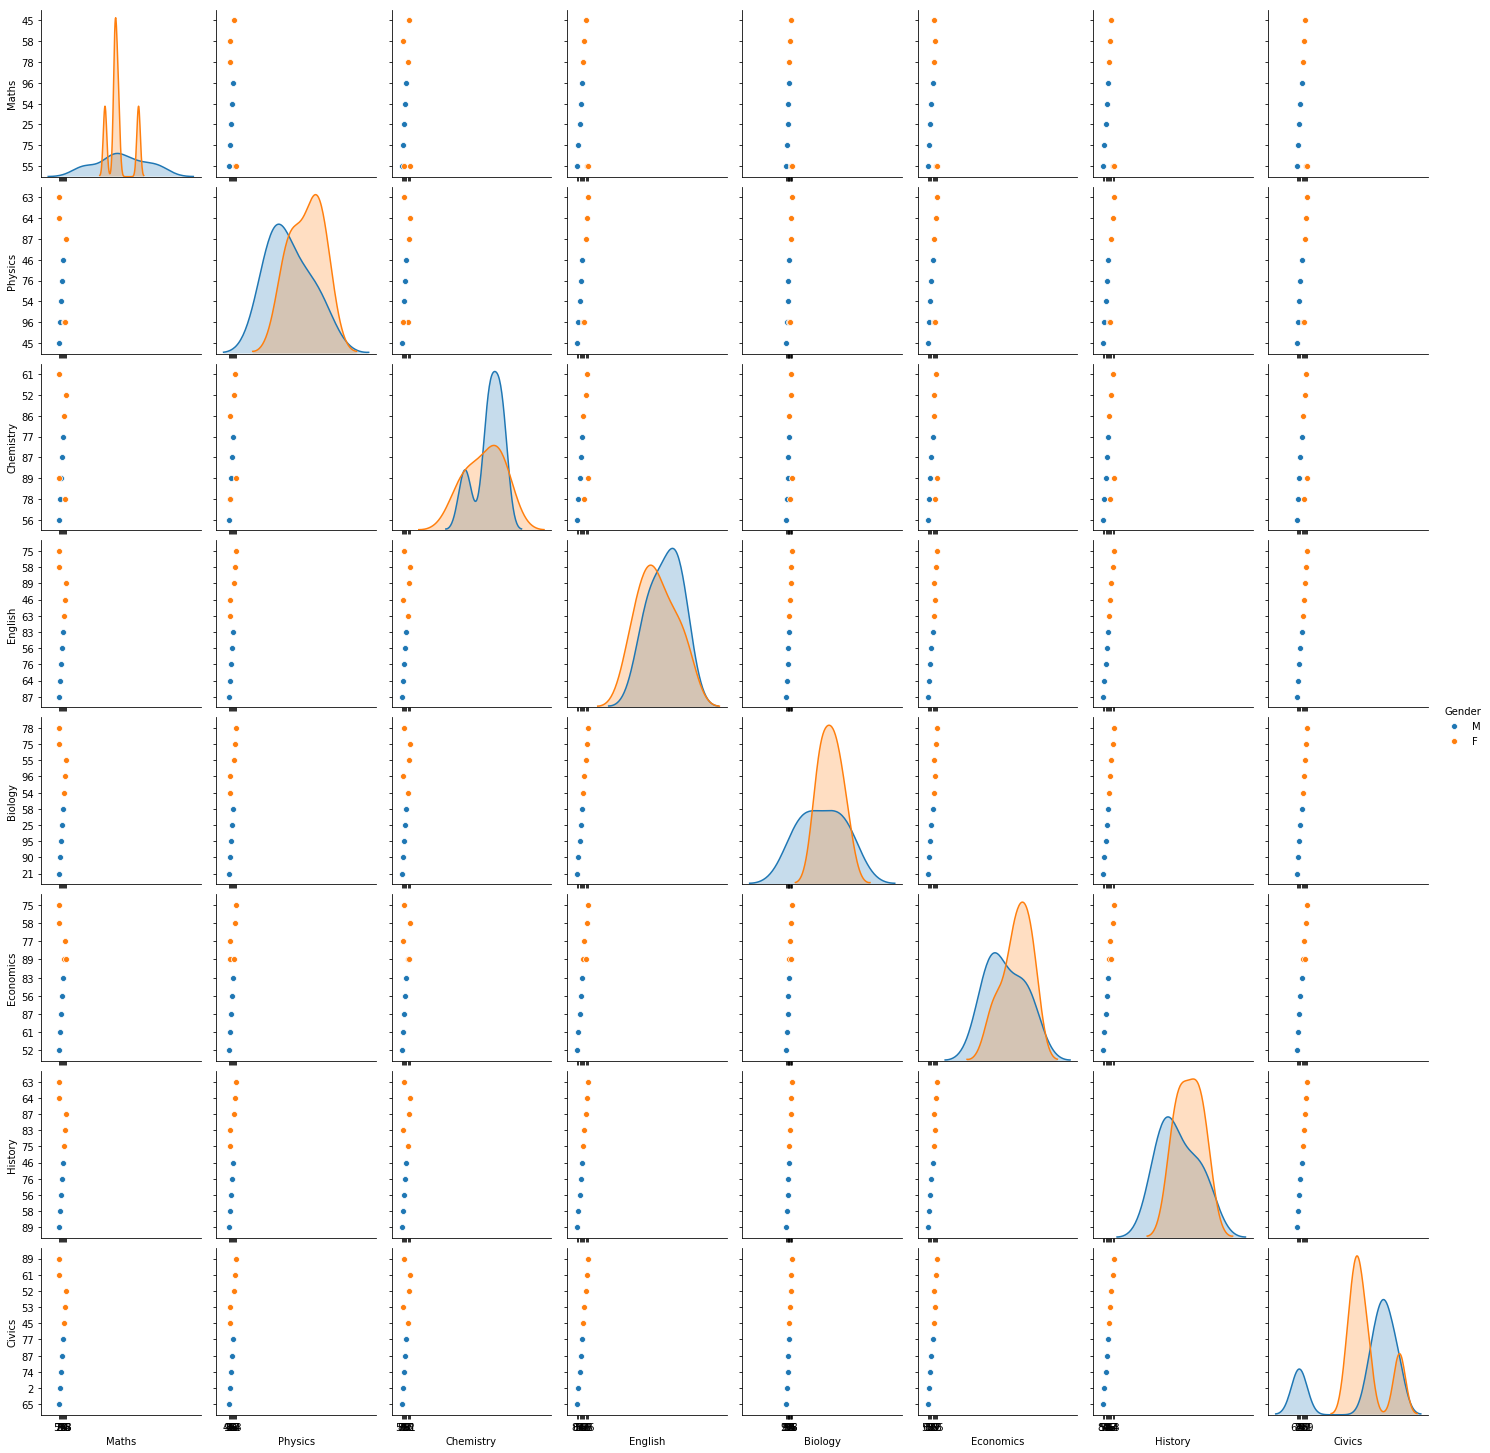

In [36]:
import warnings
warnings.filterwarnings('ignore')
sns.pairplot(data,hue='Gender')

# Encoding the Categorical Column

In [64]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
list1=['Gender']
for val in list1:
    data[val]=Le.fit_transform(data[val].astype(str))

# Dropping the non numeric columns

In [62]:
data.drop(['Name'],axis=1,inplace=True)

In [63]:
data.drop(['DOB'],axis=1,inplace=True)

In [65]:
data.columns

Index(['Gender', 'Maths', 'Physics', 'Chemistry', 'English', 'Biology',
       'Economics', 'History', 'Civics'],
      dtype='object')

In this project we have made the connection between mysql and jupyter notebook and performed EDA on student_marks using sql query.